# Testing the Right Arm

**Warning:** Before running this notebook, first make sure you understand the command you run and make sure that the robot can freely move.

**Note:** Also stop all other running Python script or notebook connected to the robot as only one connection can run at the same time.

In [1]:
%matplotlib notebook

import time
import numpy as np

from matplotlib import pyplot as plt

## Connect to the right arm

In [2]:
from reachy import Reachy, parts

In [3]:
reachy = Reachy(
    #right_arm=parts.RightArm(io='/dev/ttyUSB*', hand='force_gripper'),
    right_arm=parts.RightArm(io='ws', hand='force_gripper'),
)

You can now connect your robot in Unity.

## Check motors

Check that all motors are presents

In [4]:
for m in reachy.right_arm.motors:
    print(f'{m.name} - pos:{m.present_position} temp:{m.temperature}')

right_arm.shoulder_pitch - pos:0.0 temp:20
right_arm.shoulder_roll - pos:0.0 temp:20
right_arm.arm_yaw - pos:-0.0 temp:20
right_arm.elbow_pitch - pos:-0.0 temp:20
right_arm.hand.forearm_yaw - pos:-0.0 temp:20
right_arm.hand.wrist_pitch - pos:-0.0 temp:20
right_arm.hand.wrist_roll - pos:-0.0 temp:20
right_arm.hand.gripper - pos:0.0 temp:20


Move the arm and check that the position are moving

## Turn stiff/compliant

In [5]:
for m in reachy.right_arm.motors:
    m.compliant = False

In [6]:
for m in reachy.right_arm.motors:
    m.compliant = True

Check that all motors are turning compliant/stiff.

## Goto 0 pos + 90 on the elbow

In [7]:
for m in reachy.right_arm.motors:
    m.compliant = False

In [8]:
reachy.goto({
    'right_arm.shoulder_pitch': 0,
    'right_arm.shoulder_roll': 0,
    'right_arm.arm_yaw': 0,    
    'right_arm.elbow_pitch': -90,
    'right_arm.hand.forearm_yaw': 0,
    'right_arm.hand.wrist_pitch': 0,
    'right_arm.hand.wrist_roll': 0,
    'right_arm.hand.gripper': 0,
}, duration=3, wait=True)

Check that everything seems fine.

In [9]:
for m in reachy.right_arm.motors:
    m.compliant = True

## Record a trajectory and replay it

*This part doesn't really seem to work with the simulator. - PC*

In [10]:
from reachy.trajectory import TrajectoryRecorder, TrajectoryPlayer

In [11]:
recorder = TrajectoryRecorder(reachy.right_arm.motors)

We will record a move for 10sec. Make sure you hold the robot away from all objects before starting the record.

In [12]:
recorder.start()
time.sleep(10)
recorder.stop()

Turn all motors stiff (try putting the robot in about its starting position of the trajectory).

In [13]:
for m in reachy.right_arm.motors:
    m.compliant = False

In [14]:
player = TrajectoryPlayer(reachy, recorder.trajectories)
player.play(wait=True, fade_in_duration=3)

Turn it back compliant.

In [15]:
for m in reachy.right_arm.motors:
    m.compliant = True

Look at the recorded traj.

<IPython.core.display.Javascript object>


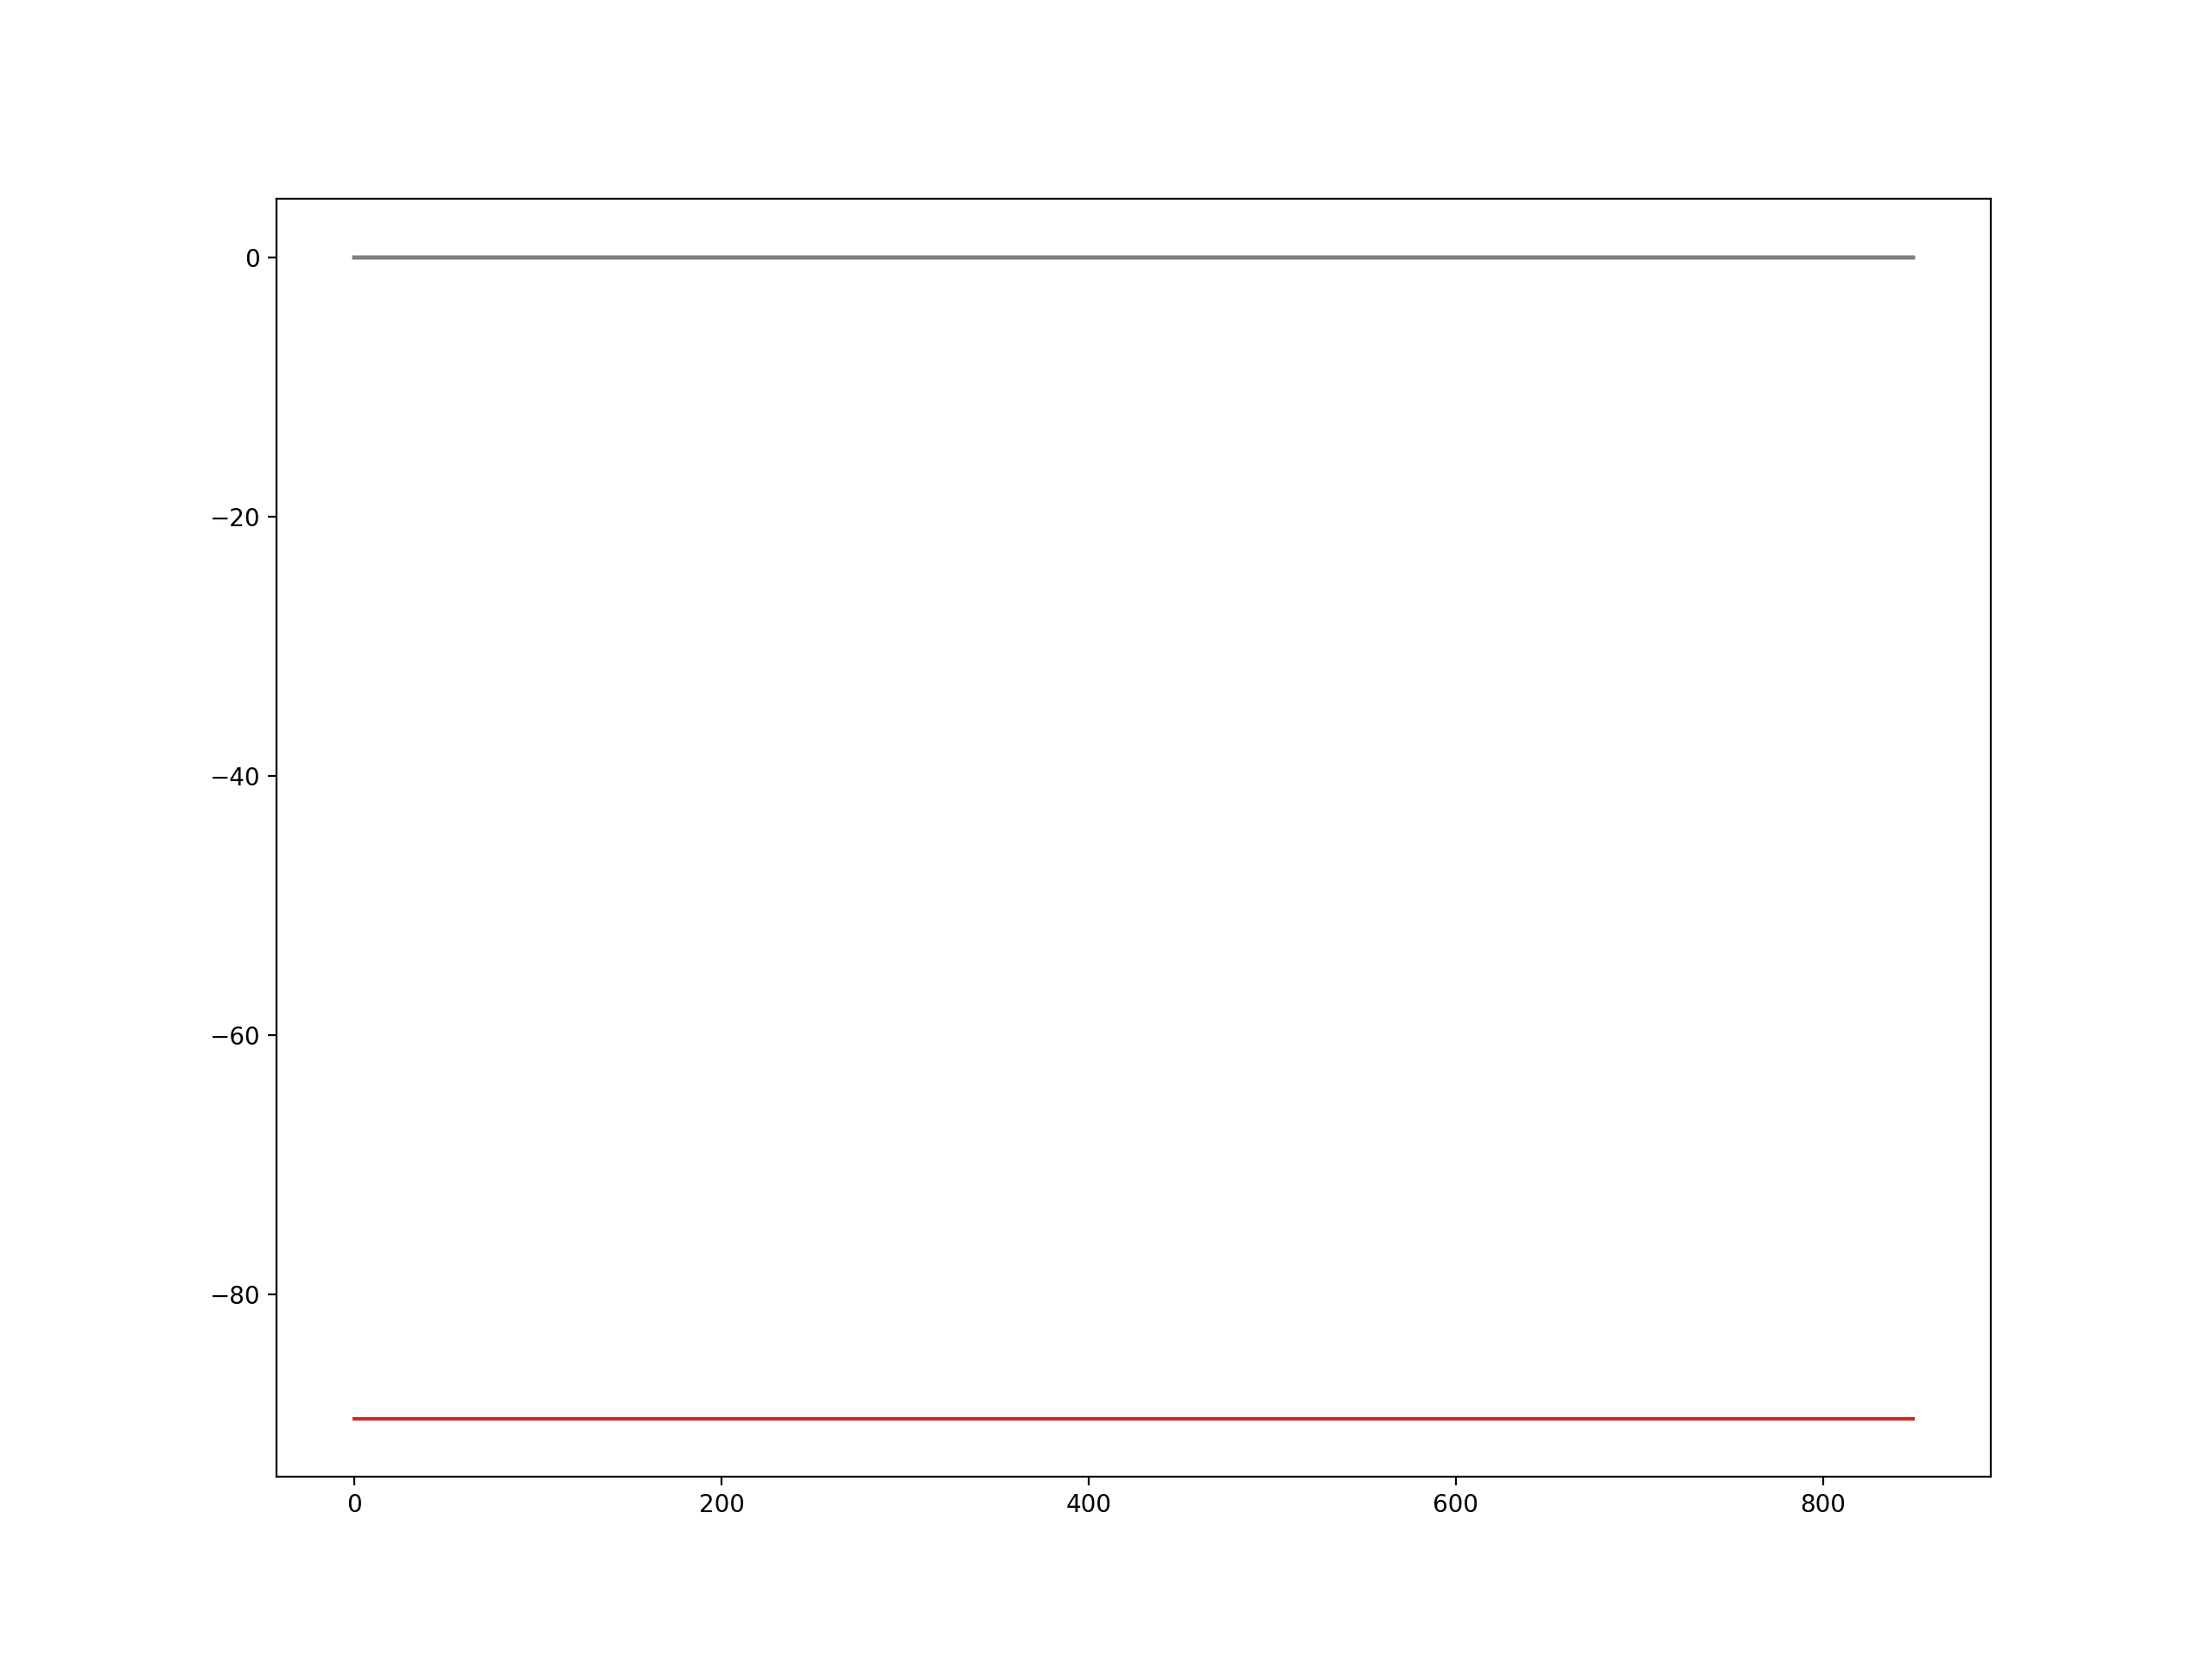

In [16]:
plt.figure()

for k, v in recorder.trajectories.items():
    plt.plot(v, label=k)
# plt.legend()

## Grasp objects

Put an object inside the hand of the robot and then run the line below to close it.

In [17]:
reachy.right_arm.hand.gripper.compliant = False

In [18]:
reachy.right_arm.hand.close()

False

Check that the close method returned true. Check the object holds in its hand while moving the arm manually.

*This returns false because you can't really put in anything in Reachy's hand in the simulator. - PC*

Then we reopen the hand.

In [19]:
reachy.right_arm.hand.open()

In [20]:
reachy.right_arm.hand.gripper.compliant = True

## Check kinematics

Put the arm in a position where its hand is facing forward and where it can move at least 10cm in all direction.

In [21]:
for m in reachy.right_arm.motors:
    m.compliant = False

In [22]:
J0 = [m.present_position for m in reachy.right_arm.motors]

M = reachy.right_arm.forward_kinematics(J0)

M1 = M.copy()
M1[0, 3] += 0.05
J1 = reachy.right_arm.inverse_kinematics(M1, J0)

M2 = M.copy()
M2[0, 3] -= 0.05
J2 = reachy.right_arm.inverse_kinematics(M2, J0)

M3 = M.copy()
M3[1, 3] += 0.05
J3 = reachy.right_arm.inverse_kinematics(M3, J0)

M4 = M.copy()
M4[1, 3] -= 0.05
J4 = reachy.right_arm.inverse_kinematics(M4, J0)

In [23]:
_ = reachy.goto({m.name: j for j, m in zip(J1, reachy.right_arm.motors)}, duration=1, wait=True)
_ = reachy.goto({m.name: j for j, m in zip(J2, reachy.right_arm.motors)}, duration=1, wait=True)
_ = reachy.goto({m.name: j for j, m in zip(J3, reachy.right_arm.motors)}, duration=1, wait=True)
_ = reachy.goto({m.name: j for j, m in zip(J4, reachy.right_arm.motors)}, duration=1, wait=True)
_ = reachy.goto({m.name: j for j, m in zip(J0, reachy.right_arm.motors)}, duration=1, wait=True)

In [24]:
for m in reachy.right_arm.motors:
    m.compliant = True

## Check the fans

*I'm not really sure if this does anything in the simulator. - PC*

In [25]:
reachy.right_arm.shoulder_fan.on()

In [26]:
reachy.right_arm.shoulder_fan.off()

In [27]:
reachy.right_arm.elbow_fan.on()

In [28]:
reachy.right_arm.elbow_fan.off()

In [29]:
reachy.right_arm.wrist_fan.on()

In [30]:
reachy.right_arm.wrist_fan.off()